# Importing Libraries 

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,recall_score,precision_score,f1_score,log_loss,roc_auc_score
pd.set_option("display.max_columns",30)
import warnings
warnings.filterwarnings("ignore")

# Project 
## Plant Disease Prediction 

In [95]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\plant_disease_dataset.csv")

# Data Info

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      10000 non-null  float64
 1   humidity         10000 non-null  float64
 2   rainfall         10000 non-null  float64
 3   soil_pH          10000 non-null  float64
 4   disease_present  10000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


In [97]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [98]:
df.shape

(10000, 5)

# Data Cleaning & Handling 

In [99]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA, Visualization & Machine Learning

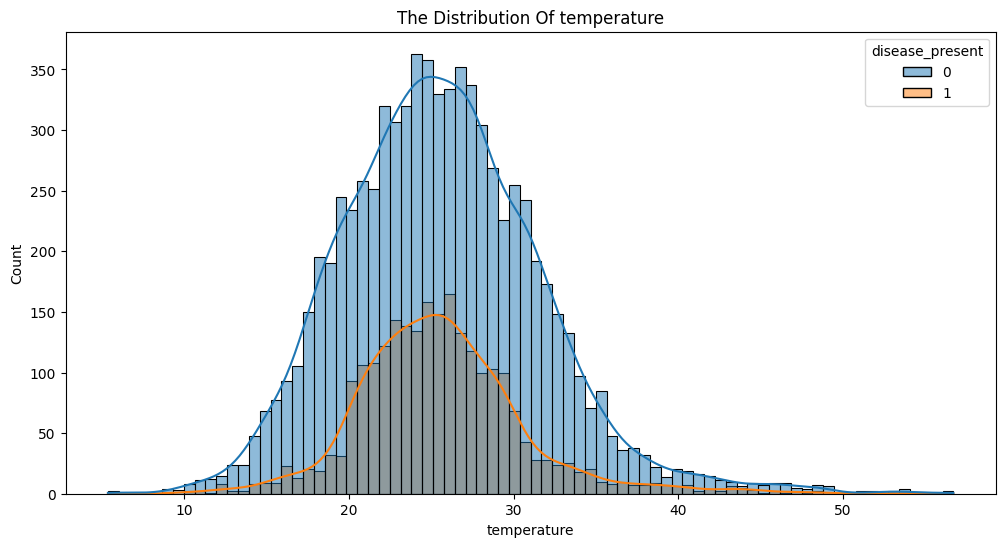

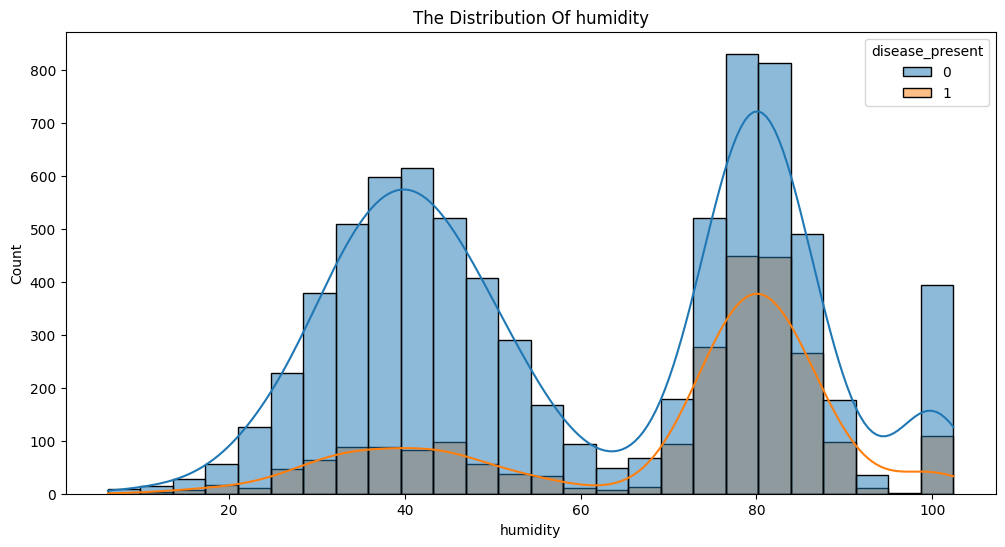

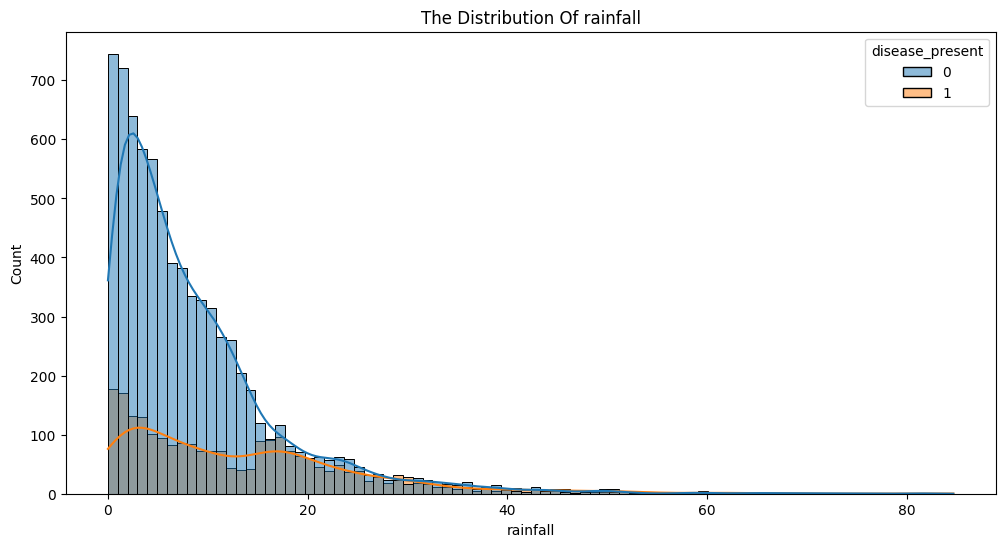

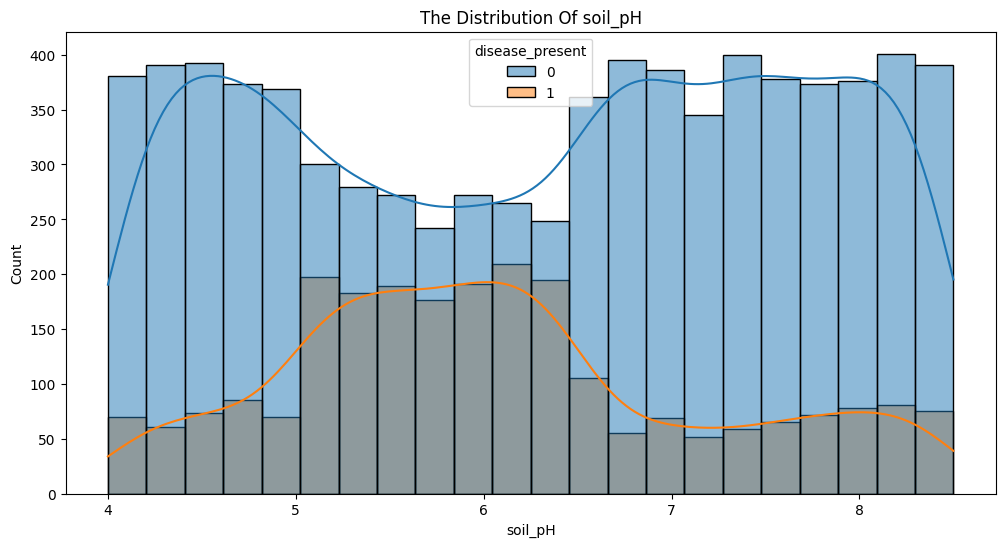

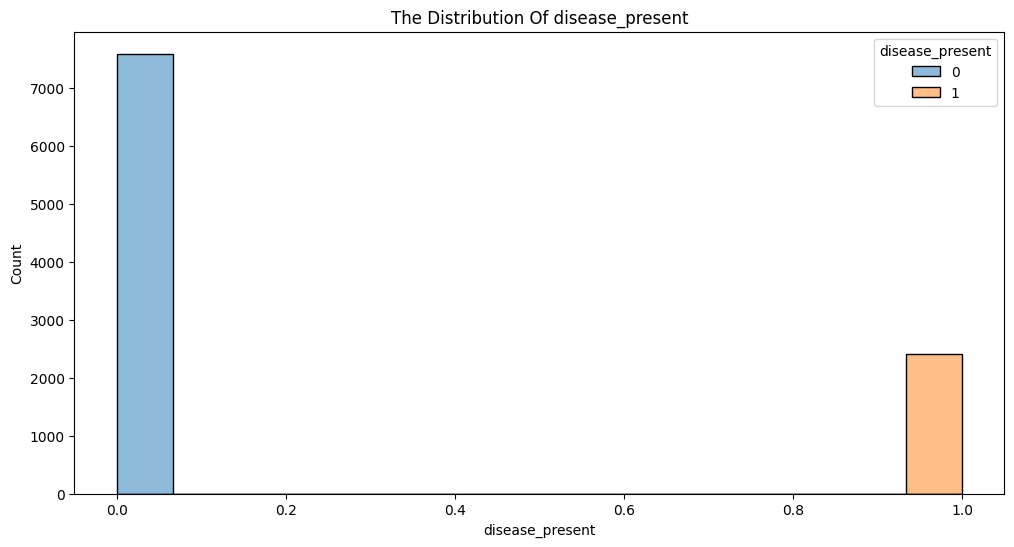

In [100]:
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="disease_present")
    plt.title(f"The Distribution Of {col}")
    plt.show()

<Axes: xlabel='disease_present', ylabel='count'>

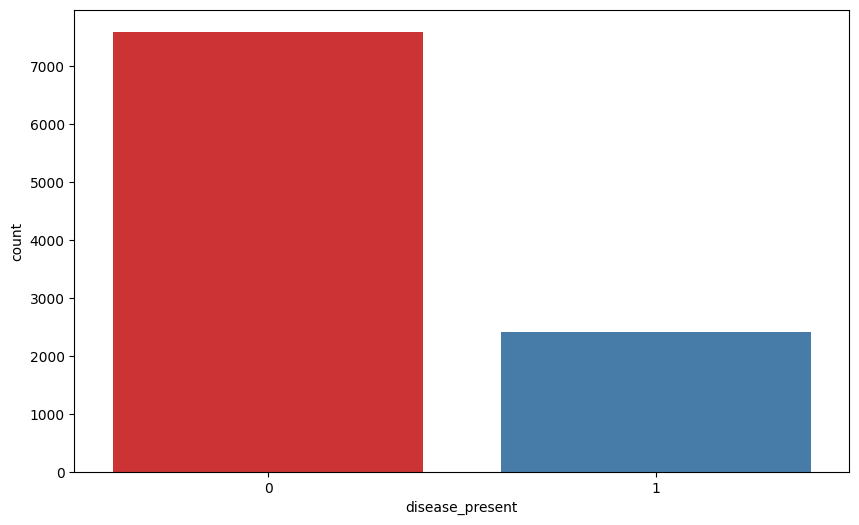

In [101]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="disease_present",palette="Set1")

In [102]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


# Logistic Regression Model

In [103]:
x=df.drop(columns=["disease_present"])
y=df["disease_present"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model_lg=LogisticRegression()
model_lg.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [104]:
y_pred=model_lg.predict(x_test_scaled)
y_prob = model_lg.predict_proba(x_test_scaled)[:, 1]

In [105]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Log Loss
loss = log_loss(y_test, y_prob)
print("Log Loss:", loss)


Accuracy: 0.763
Precision: 0.5540540540540541
Recall: 0.08506224066390042
F1 Score: 0.1474820143884892
ROC AUC Score: 0.7074839136448374
Log Loss: 0.5037292141566756
